# Shapelets (directional trend) # 
time series subsequences which are, in some sense, maximally representative of a class.

https://stumpy.readthedocs.io/en/latest/Tutorial_Shapelet_Discovery.html

In [1]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

## GunPoint Dataset ##

TODO description

In [14]:
# SETUP
UCR_PATH = "../data/UCRArchive_2018"

use_case = "shapelets"
data_name = "GunPoint"

x_train, y_train = testdata.load_ucr_dataset_from_tsv(UCR_PATH, data_name, "TRAIN")
x_test, y_test = testdata.load_ucr_dataset_from_tsv(UCR_PATH, data_name, "TEST")

gun_df = x_train[x_train['0'] == 0].iloc[:, 1:].reset_index(drop=True)
gun_df = (gun_df.assign(NaN=np.nan)
                .stack(dropna=False).to_frame().reset_index(drop=True)
                .rename({0: "Centroid Location"}, axis='columns')
         )

T = # TODO x_train mit nans connecten

[0.010417 0.010417 0.010417 0.       0.       0.010417 0.010417 0.010417
 0.010417 0.010417 0.020833 0.03125  0.010417 0.010417 0.010417 0.020833
 0.010417 0.010417 0.020833 0.020833 0.010417 0.010417 0.020833 0.010417
 0.020833 0.010417 0.020833 0.020833 0.020833 0.020833 0.03125  0.020833
 0.020833 0.03125  0.020833 0.020833 0.010417 0.010417 0.03125  0.03125
 0.020833 0.03125  0.020833 0.041667 0.041667 0.0625   0.114583 0.104167
 0.09375  0.104167 0.104167 0.09375  0.020833 0.020833 0.020833 0.010417
 0.020833 0.020833 0.020833 0.020833 0.041667 0.041667 0.03125  0.041667
 0.03125  0.041667 0.041667 0.041667 0.041667 0.03125  0.03125  0.03125
 0.041667 0.052083 0.041667 0.041667 0.03125  0.03125  0.041667 0.052083
 0.052083 0.052083 0.0625   0.052083 0.0625   0.0625   0.041667 0.041667
 0.041667 0.052083 0.041667 0.0625   0.052083 0.0625   0.072917 0.072917
 0.072917 0.114583 0.177083 0.15625  0.15625  0.166667 0.177083 0.135417
 0.0625   0.052083 0.041667 0.041667 0.052083 0.04166

### Experiments ###

In [3]:
# Hyperparams
target_w = 200
ds = [1,2,3,4,5,6,7,8]

In [4]:
# calculate
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name =  data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    if d == 1:
        mp = stumpy.stump(T, m=m)
    else:
        mp = stumpy.stump_dil(T, m=m, d=d)
    # TODO
    
    results.save([T, m, d, mp, all_chain_set, unanchored_chain], file_path + ".npy")

 File already exists, not saving. 


/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)


[ 35  87 139 244 296 400 452]


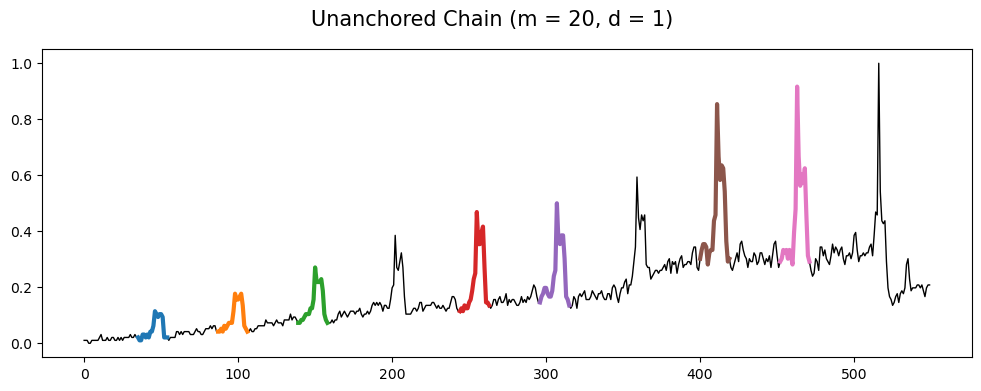

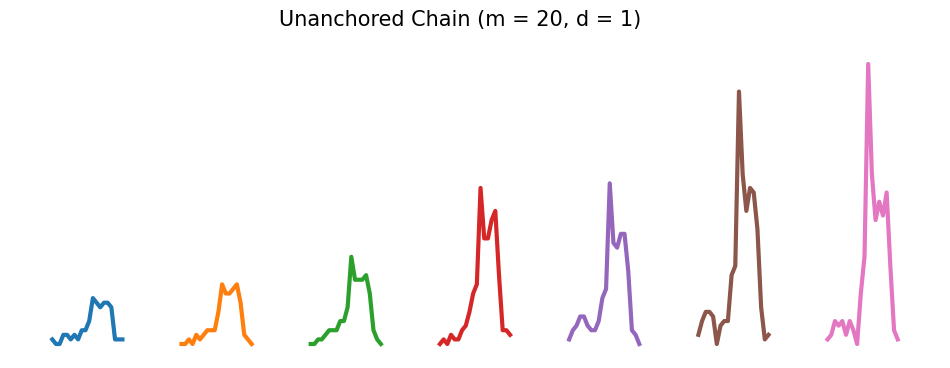

In [5]:
# visualize:
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, mp, all_chain_set, unanchored_chain = results.load(file_path + ".npy")
    
    print(unanchored_chain)
    plot = visualize.chain_unanchored(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored")
    plot = visualize.chain_unanchored_snippets(T, unanchored_chain, m, d)
    plot.savefig(file_path + "_unanchored_snippets")